# Lesson Three -  Regression Analysis

## Exercise 1 - Plotting Data with Moving Average

Throughout this exercise we will plot, investigate and gain a thorough understanding of the dataset we are to model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('synth_temp.csv')
df.head()

,AverageTemperature,Year
0,12.980258,1841
1,13.689697,1842
2,12.485703,1843
3,14.202069,1844
4,12.831530,1845


In [3]:
df = df.loc[df.Year > 1901]
df.head()

,AverageTemperature,Year
366,16.973653,1902
367,17.181773,1903
368,17.436933,1904
369,17.688948,1905
370,17.811166,1906


Construct the yearly averages

In [4]:
df_group_year = df.groupby('Year').agg(np.mean)
df_group_year.head()

,AverageTemperature
Year,
1902,17.438122
1903,17.375456
1904,17.558674
1905,17.740646
1906,17.501770


Compute the moving average filter

In [5]:
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean();
rolling.head(n=20)

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
1907          NaN
1908          NaN
1909          NaN
1910          NaN
1911    17.501145
1912    17.502700
1913    17.500737
1914    17.487112
1915    17.466333
1916    17.460069
1917    17.475434
1918    17.463959
1919    17.472423
1920    17.474037
1921    17.480317
Name: AverageTemperature, dtype: float64

Plot the raw data and moving average signal

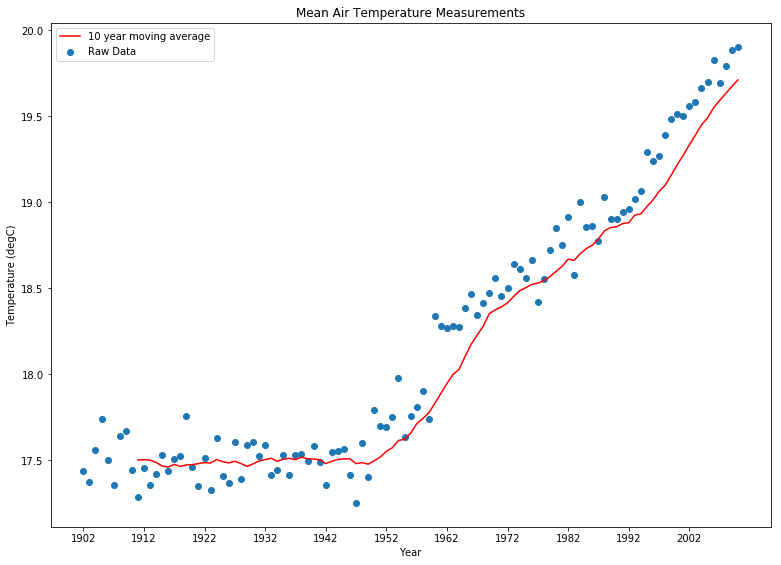

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data');
ax.plot(df_group_year.index, rolling, c='r', label=f'{window} year moving average');

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

## Exercise 2 - Least Squares Method Linear Regression
Now that we have an understanding of the dataset we will try and construct a model for the data.

In [7]:
from sklearn.linear_model import LinearRegression

Create a linear regression model using the default parameters i.e. calculate a y-intercept for the model and do not normalise the data

In [8]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now let's fit the model the input data is the year and the output value is the mean temperature for a given year.

In [9]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_group_year.index.values.reshape((-1, 1)), df_group_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [10]:
print(f'm = {model.coef_[0]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x + {model.intercept_:0.4f}')

m = 0.023146460838006862
c = -27.080386660799967

Model Definition
y = 0.02315x + -27.0804


What does the trendline provided by the model look like?  We can plot this simply using the first, middle and last years in the linear equation.

In [11]:
trend_x = np.array([
    df_group_year.index.values.min(),
    df_group_year.index.values.mean(),
    df_group_year.index.values.max()
])

trend_y = model.predict(trend_x.reshape((-1, 1)))
trend_y

array([16.94418185, 18.19409074, 19.44399962])

Plot the values with the trendling

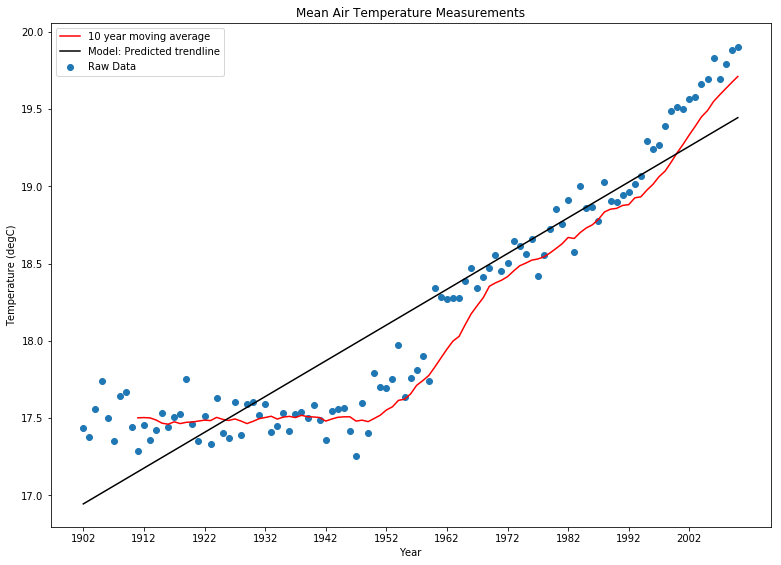

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data');
ax.plot(df_group_year.index, rolling, c='r', label=f'{window} year moving average');
ax.plot(trend_x, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

Evaluate the performance of the model

How well does the model fit the data?

In [13]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_group_year.index.values.reshape((-1, 1)), df_group_year.AverageTemperature)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.8618


## Exercise 3 - Dummy Variables

Just because we are solving a regression problem with continuous data it does not mean we cant integrate some categorical variables into our model.  These particular categorical variables, known as *Dummy Variables* are constructed from the continuous values in our dataset.  In this example we are going to create two categorical variables, one indicating if the year is greater than 1960 and one if the year is greater than 1940.  These two years were chosen as limits for creating the dummy variables because of the shape of the 15 year moving average.  As discussed there seems to be the start of an increasing trend around 1960 and 1940 was sellected as this is the approximate end of the early plateau.

In [14]:
df_group_year['Year'] = df_group_year.index

In [15]:
df_group_year['Gt_1960'] = [0 if year < 1960 else 10 for year in df_group_year.Year] # Dummy Variable - greater than 1960
df_group_year.head(n=2)

,AverageTemperature,Year,Gt_1960
Year,,,
1902,17.438122,1902,0
1903,17.375456,1903,0


In [16]:
df_group_year['Gt_1945'] = [0 if year < 1945 else 10 for year in df_group_year.Year]# Dummy Variable - greater than 1945
df_group_year.head(n=2)

,AverageTemperature,Year,Gt_1960,Gt_1945
Year,,,,
1902,17.438122,1902,0,0
1903,17.375456,1903,0,0


In [17]:
df_group_year.tail(n=2)

,AverageTemperature,Year,Gt_1960,Gt_1945
Year,,,,
2009,19.884571,2009,10,10
2010,19.903760,2010,10,10


In [18]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_group_year[['Year', 'Gt_1960', 'Gt_1945']], df_group_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_group_year[['Year', 'Gt_1960', 'Gt_1945']], df_group_year.AverageTemperature)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.9128


In [20]:
# Use linspace to get a range of values, in 20 yr increments
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
x

array([1902.        , 1907.68421053, 1913.36842105, 1919.05263158,
       1924.73684211, 1930.42105263, 1936.10526316, 1941.78947368,
       1947.47368421, 1953.15789474, 1958.84210526, 1964.52631579,
       1970.21052632, 1975.89473684, 1981.57894737, 1987.26315789,
       1992.94736842, 1998.63157895, 2004.31578947, 2010.        ])

In [21]:
trend_x = np.zeros((20, 3))
trend_x[:,0] = x # Assign to the first column
trend_x[:,1] = [10 if _x > 1960 else 0 for _x in x] # Assign to the second column
trend_x[:,2] = [10 if _x > 1945 else 0 for _x in x] # Assign to the third column 
trend_x

array([[1902.        ,    0.        ,    0.        ],
       [1907.68421053,    0.        ,    0.        ],
       [1913.36842105,    0.        ,    0.        ],
       [1919.05263158,    0.        ,    0.        ],
       [1924.73684211,    0.        ,    0.        ],
       [1930.42105263,    0.        ,    0.        ],
       [1936.10526316,    0.        ,    0.        ],
       [1941.78947368,    0.        ,    0.        ],
       [1947.47368421,    0.        ,   10.        ],
       [1953.15789474,    0.        ,   10.        ],
       [1958.84210526,    0.        ,   10.        ],
       [1964.52631579,   10.        ,   10.        ],
       [1970.21052632,   10.        ,   10.        ],
       [1975.89473684,   10.        ,   10.        ],
       [1981.57894737,   10.        ,   10.        ],
       [1987.26315789,   10.        ,   10.        ],
       [1992.94736842,   10.        ,   10.        ],
       [1998.63157895,   10.        ,   10.        ],
       [2004.31578947,   10.

In [22]:
trend_y = model.predict(trend_x)
trend_y

array([17.06063456, 17.17806179, 17.29548901, 17.41291624, 17.53034347,
       17.6477707 , 17.76519793, 17.88262516, 17.57196656, 17.68939379,
       17.80682102, 18.51649321, 18.63392043, 18.75134766, 18.86877489,
       18.98620212, 19.10362935, 19.22105658, 19.33848381, 19.45591104])

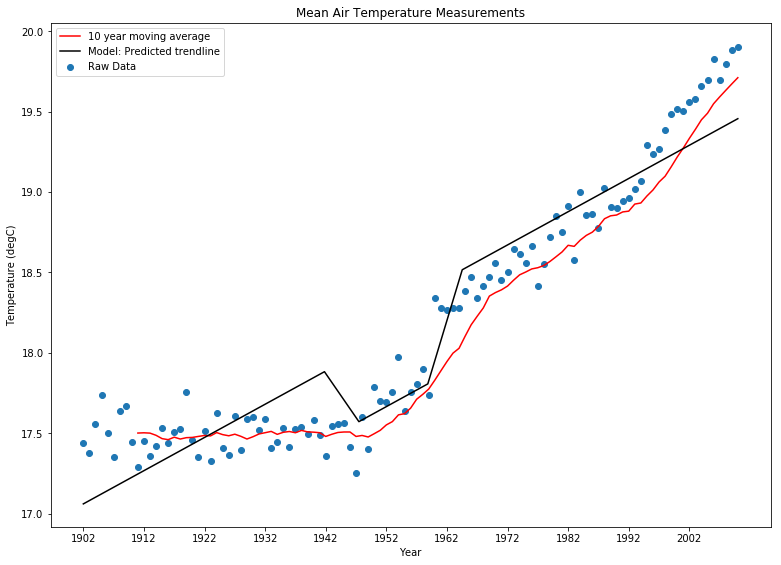

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data');
ax.plot(df_group_year.index, rolling, c='r', label=f'{window} year moving average');
ax.plot(trend_x[:,0], trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

## Exercise 4 - Parabolic Models with Linear Regression
The moving average of the land temperature measurements seems to have parabolic features.  To incorporate these paraboloic features into the model we need to add a squared term. Remember the equation of a parabola can be defined as:

$$y = ax^2 + mx + c$$



In [24]:
df_group_year['Year'] = df_group_year.index
df_group_year['Year2'] = df_group_year.index ** 2
df_group_year.head()

,AverageTemperature,Year,Gt_1960,Gt_1945,Year2
Year,,,,,
1902,17.438122,1902,0,0,3617604
1903,17.375456,1903,0,0,3621409
1904,17.558674,1904,0,0,3625216
1905,17.740646,1905,0,0,3629025
1906,17.501770,1906,0,0,3632836


In [25]:
df_group_year[['Year', 'Year2']]

,Year,Year2
Year,,
1902,1902,3617604
1903,1903,3621409
1904,1904,3625216
1905,1905,3629025
1906,1906,3632836
1907,1907,3636649
1908,1908,3640464
1909,1909,3644281
1910,1910,3648100


In [26]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_group_year[['Year2', 'Year']], df_group_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [27]:
print(f'a = {model.coef_[0]}')
print(f'm = {model.coef_[1]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x^2 + {model.coef_[1]:0.4}x + {model.intercept_:0.4f}')

a = 0.0002814670724607414
m = -1.0779527266284135
c = 1049.5159662796232

Model Definition
y = 0.0002815x^2 + -1.078x + 1049.5160


In [28]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_group_year[['Year2', 'Year']], df_group_year.AverageTemperature)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.9627


In [29]:
# Use linspace to get a range of values, in 20 yr increments
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
x

array([1902.        , 1907.68421053, 1913.36842105, 1919.05263158,
       1924.73684211, 1930.42105263, 1936.10526316, 1941.78947368,
       1947.47368421, 1953.15789474, 1958.84210526, 1964.52631579,
       1970.21052632, 1975.89473684, 1981.57894737, 1987.26315789,
       1992.94736842, 1998.63157895, 2004.31578947, 2010.        ])

In [30]:
trend_x = np.zeros((20, 2))
trend_x[:,0] = x ** 2 # Assign to the first column
trend_x[:,1] = x # Assign to the second column 
trend_x

array([[3.61760400e+06, 1.90200000e+03],
       [3.63925905e+06, 1.90768421e+03],
       [3.66097871e+06, 1.91336842e+03],
       [3.68276300e+06, 1.91905263e+03],
       [3.70461191e+06, 1.92473684e+03],
       [3.72652544e+06, 1.93042105e+03],
       [3.74850359e+06, 1.93610526e+03],
       [3.77054636e+06, 1.94178947e+03],
       [3.79265375e+06, 1.94747368e+03],
       [3.81482576e+06, 1.95315789e+03],
       [3.83706239e+06, 1.95884211e+03],
       [3.85936365e+06, 1.96452632e+03],
       [3.88172952e+06, 1.97021053e+03],
       [3.90416001e+06, 1.97589474e+03],
       [3.92665512e+06, 1.98157895e+03],
       [3.94921486e+06, 1.98726316e+03],
       [3.97183921e+06, 1.99294737e+03],
       [3.99452819e+06, 1.99863158e+03],
       [4.01728178e+06, 2.00431579e+03],
       [4.04010000e+06, 2.01000000e+03]])

In [31]:
trend_y = model.predict(trend_x)
trend_y

array([17.48628743, 17.45415991, 17.44022092, 17.44447048, 17.46690858,
       17.50753523, 17.56635041, 17.64335414, 17.73854641, 17.85192723,
       17.98349658, 18.13325448, 18.30120092, 18.48733591, 18.69165943,
       18.9141715 , 19.15487211, 19.41376127, 19.69083897, 19.98610521])

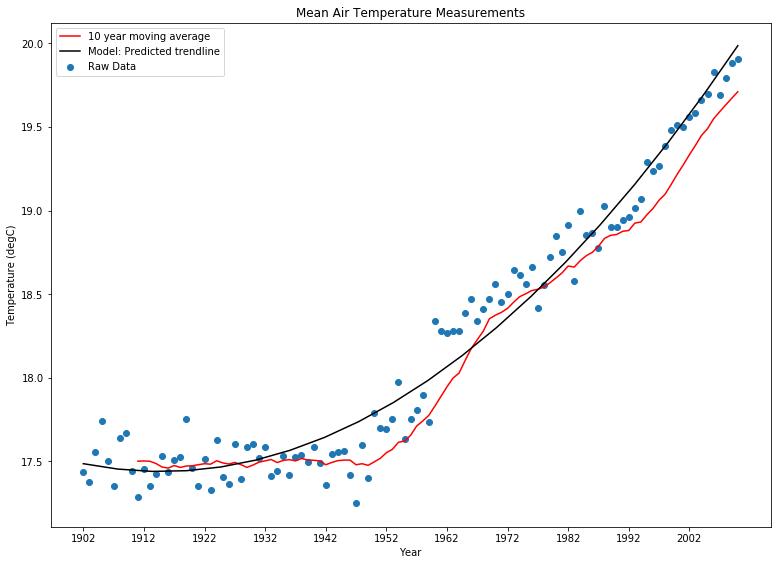

In [32]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data');
ax.plot(df_group_year.index, rolling, c='r', label=f'{window} year moving average');
ax.plot(trend_x[:,1], trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

In [33]:
model.coef_

array([ 2.81467072e-04, -1.07795273e+00])

## Exercise 5 - Gradient Descent

This example looks at the application of gradient descent to our linear model.  Again we will use our first linear model:

$$ y = mx + b$$

But we will rewrite in the more convenient form:

$$ h(x) = \sum_{i=0}^N \Theta_i x_i$$

where $x_0 = 1$

In [34]:
def h_x(weights, x):
    return np.dot(weights, x).flatten()

Scale the values to be between 0 and 1 by dividing by the maximum value.

As we are assigning $x_0 = 1$ we need to insert a row of ones into our training data

In [35]:
x = np.ones((2, len(df_group_year)))
x[0,:] = df_group_year.Year
x[1,:] = 1
x /= x.max()
x[:,:5]

array([[9.46268657e-01, 9.46766169e-01, 9.47263682e-01, 9.47761194e-01,
        9.48258706e-01],
       [4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04]])

Initialise the random number generator with a constant value to ensure the original random number remains consistent.

In [36]:
np.random.seed(255) # Ensure the same starting random values

We will also use random values between 0 and 1 as our initial guesses for $\Theta$.  We want our initial values to be close to 0, but still random.

In [37]:
Theta = np.random.randn(2).reshape((1, 2)) * 0.1
Theta

array([[-0.15134119, -0.01970609]])

We will also define our ground truth values

In [38]:
y_true = df_group_year.AverageTemperature.values

The cost function is also required for gradient descent.  So define J_theta

In [39]:
def J_theta(pred, true):
    
    return np.mean((pred - true) ** 2) # mean squared error

We also need to define how large a step to take i.e. the learning rate $\gamma$

In [40]:
gamma = 1e-6

We also need to define a function to update the parameters Theta.  As a reminder the equation to update gradient descent is:

$$\Theta_j := \Theta_j + \gamma \sum_{i=1}^N (y_{(i)} - h(x^{(i)}))x_j^{(i)}$$

In [41]:
def update(pred, true, x, gamma):
    return gamma * np.sum((true - pred) * x, axis=1)

Define the maximum number of epochs to train for:

In [42]:
max_epochs = 100000

We will step through the first iteration of gradient descent manually to observe what is going on.  We will first calculate the original error value using the randomly initialised weights.

In [43]:
y_pred = h_x(Theta, x)
print(f'Initial cost J(Theta) = {J_theta(y_pred, y_true): 0.3f}')

Initial cost J(Theta) =  337.025


We will now complete the first update

In [44]:
Theta += update(y_pred, y_true, x, gamma)

y_pred = h_x(Theta, x)
print(f'Initial cost J(Theta) = {J_theta(y_pred, y_true): 0.3f}')

Initial cost J(Theta) =  336.955


Notice the reduction in the error, our training is one the way!!!  Now we will repeat this process for a fixed number of iterations or epochs.

In [45]:
error_hist = []
epoch_hist = []
for epoch in range(max_epochs):
    Theta += update(y_pred, y_true, x, gamma)
    y_pred = h_x(Theta, x)  
    
    if (epoch % 10) == 0:
        _err = J_theta(y_pred, y_true)
        error_hist.append(_err)
        epoch_hist.append(epoch)
        print(f'epoch:{epoch:4d} J(Theta) = {_err: 9.3f}')

epoch:   0 J(Theta) =   336.886
epoch:  10 J(Theta) =   336.191
epoch:  20 J(Theta) =   335.499
epoch:  30 J(Theta) =   334.807
epoch:  40 J(Theta) =   334.117
epoch:  50 J(Theta) =   333.428
epoch:  60 J(Theta) =   332.741
epoch:  70 J(Theta) =   332.055
epoch:  80 J(Theta) =   331.371
epoch:  90 J(Theta) =   330.688
epoch: 100 J(Theta) =   330.006
epoch: 110 J(Theta) =   329.326
epoch: 120 J(Theta) =   328.647
epoch: 130 J(Theta) =   327.969
epoch: 140 J(Theta) =   327.293
epoch: 150 J(Theta) =   326.619
epoch: 160 J(Theta) =   325.946
epoch: 170 J(Theta) =   325.274
epoch: 180 J(Theta) =   324.603
epoch: 190 J(Theta) =   323.934
epoch: 200 J(Theta) =   323.267
epoch: 210 J(Theta) =   322.600
epoch: 220 J(Theta) =   321.935
epoch: 230 J(Theta) =   321.272
epoch: 240 J(Theta) =   320.609
epoch: 250 J(Theta) =   319.949
epoch: 260 J(Theta) =   319.289
epoch: 270 J(Theta) =   318.631
epoch: 280 J(Theta) =   317.974
epoch: 290 J(Theta) =   317.319
epoch: 300 J(Theta) =   316.665
epoch: 3

epoch:5340 J(Theta) =   112.015
epoch:5350 J(Theta) =   111.784
epoch:5360 J(Theta) =   111.554
epoch:5370 J(Theta) =   111.325
epoch:5380 J(Theta) =   111.096
epoch:5390 J(Theta) =   110.867
epoch:5400 J(Theta) =   110.639
epoch:5410 J(Theta) =   110.411
epoch:5420 J(Theta) =   110.184
epoch:5430 J(Theta) =   109.957
epoch:5440 J(Theta) =   109.731
epoch:5450 J(Theta) =   109.505
epoch:5460 J(Theta) =   109.280
epoch:5470 J(Theta) =   109.055
epoch:5480 J(Theta) =   108.831
epoch:5490 J(Theta) =   108.607
epoch:5500 J(Theta) =   108.383
epoch:5510 J(Theta) =   108.160
epoch:5520 J(Theta) =   107.938
epoch:5530 J(Theta) =   107.715
epoch:5540 J(Theta) =   107.494
epoch:5550 J(Theta) =   107.273
epoch:5560 J(Theta) =   107.052
epoch:5570 J(Theta) =   106.832
epoch:5580 J(Theta) =   106.612
epoch:5590 J(Theta) =   106.392
epoch:5600 J(Theta) =   106.173
epoch:5610 J(Theta) =   105.955
epoch:5620 J(Theta) =   105.737
epoch:5630 J(Theta) =   105.519
epoch:5640 J(Theta) =   105.302
epoch:56

epoch:11810 J(Theta) =    29.648
epoch:11820 J(Theta) =    29.587
epoch:11830 J(Theta) =    29.526
epoch:11840 J(Theta) =    29.466
epoch:11850 J(Theta) =    29.406
epoch:11860 J(Theta) =    29.346
epoch:11870 J(Theta) =    29.286
epoch:11880 J(Theta) =    29.226
epoch:11890 J(Theta) =    29.166
epoch:11900 J(Theta) =    29.107
epoch:11910 J(Theta) =    29.047
epoch:11920 J(Theta) =    28.988
epoch:11930 J(Theta) =    28.929
epoch:11940 J(Theta) =    28.869
epoch:11950 J(Theta) =    28.810
epoch:11960 J(Theta) =    28.752
epoch:11970 J(Theta) =    28.693
epoch:11980 J(Theta) =    28.634
epoch:11990 J(Theta) =    28.576
epoch:12000 J(Theta) =    28.517
epoch:12010 J(Theta) =    28.459
epoch:12020 J(Theta) =    28.401
epoch:12030 J(Theta) =    28.343
epoch:12040 J(Theta) =    28.285
epoch:12050 J(Theta) =    28.227
epoch:12060 J(Theta) =    28.170
epoch:12070 J(Theta) =    28.112
epoch:12080 J(Theta) =    28.055
epoch:12090 J(Theta) =    27.997
epoch:12100 J(Theta) =    27.940
epoch:1211

epoch:18730 J(Theta) =     7.311
epoch:18740 J(Theta) =     7.296
epoch:18750 J(Theta) =     7.282
epoch:18760 J(Theta) =     7.267
epoch:18770 J(Theta) =     7.253
epoch:18780 J(Theta) =     7.238
epoch:18790 J(Theta) =     7.224
epoch:18800 J(Theta) =     7.210
epoch:18810 J(Theta) =     7.195
epoch:18820 J(Theta) =     7.181
epoch:18830 J(Theta) =     7.167
epoch:18840 J(Theta) =     7.153
epoch:18850 J(Theta) =     7.138
epoch:18860 J(Theta) =     7.124
epoch:18870 J(Theta) =     7.110
epoch:18880 J(Theta) =     7.096
epoch:18890 J(Theta) =     7.082
epoch:18900 J(Theta) =     7.068
epoch:18910 J(Theta) =     7.054
epoch:18920 J(Theta) =     7.040
epoch:18930 J(Theta) =     7.026
epoch:18940 J(Theta) =     7.012
epoch:18950 J(Theta) =     6.998
epoch:18960 J(Theta) =     6.984
epoch:18970 J(Theta) =     6.970
epoch:18980 J(Theta) =     6.957
epoch:18990 J(Theta) =     6.943
epoch:19000 J(Theta) =     6.929
epoch:19010 J(Theta) =     6.915
epoch:19020 J(Theta) =     6.902
epoch:1903

epoch:25940 J(Theta) =     1.862
epoch:25950 J(Theta) =     1.859
epoch:25960 J(Theta) =     1.856
epoch:25970 J(Theta) =     1.852
epoch:25980 J(Theta) =     1.849
epoch:25990 J(Theta) =     1.846
epoch:26000 J(Theta) =     1.843
epoch:26010 J(Theta) =     1.839
epoch:26020 J(Theta) =     1.836
epoch:26030 J(Theta) =     1.833
epoch:26040 J(Theta) =     1.830
epoch:26050 J(Theta) =     1.827
epoch:26060 J(Theta) =     1.823
epoch:26070 J(Theta) =     1.820
epoch:26080 J(Theta) =     1.817
epoch:26090 J(Theta) =     1.814
epoch:26100 J(Theta) =     1.811
epoch:26110 J(Theta) =     1.807
epoch:26120 J(Theta) =     1.804
epoch:26130 J(Theta) =     1.801
epoch:26140 J(Theta) =     1.798
epoch:26150 J(Theta) =     1.795
epoch:26160 J(Theta) =     1.792
epoch:26170 J(Theta) =     1.789
epoch:26180 J(Theta) =     1.785
epoch:26190 J(Theta) =     1.782
epoch:26200 J(Theta) =     1.779
epoch:26210 J(Theta) =     1.776
epoch:26220 J(Theta) =     1.773
epoch:26230 J(Theta) =     1.770
epoch:2624

epoch:32610 J(Theta) =     0.675
epoch:32620 J(Theta) =     0.674
epoch:32630 J(Theta) =     0.673
epoch:32640 J(Theta) =     0.673
epoch:32650 J(Theta) =     0.672
epoch:32660 J(Theta) =     0.671
epoch:32670 J(Theta) =     0.670
epoch:32680 J(Theta) =     0.669
epoch:32690 J(Theta) =     0.669
epoch:32700 J(Theta) =     0.668
epoch:32710 J(Theta) =     0.667
epoch:32720 J(Theta) =     0.666
epoch:32730 J(Theta) =     0.665
epoch:32740 J(Theta) =     0.665
epoch:32750 J(Theta) =     0.664
epoch:32760 J(Theta) =     0.663
epoch:32770 J(Theta) =     0.662
epoch:32780 J(Theta) =     0.661
epoch:32790 J(Theta) =     0.661
epoch:32800 J(Theta) =     0.660
epoch:32810 J(Theta) =     0.659
epoch:32820 J(Theta) =     0.658
epoch:32830 J(Theta) =     0.657
epoch:32840 J(Theta) =     0.657
epoch:32850 J(Theta) =     0.656
epoch:32860 J(Theta) =     0.655
epoch:32870 J(Theta) =     0.654
epoch:32880 J(Theta) =     0.653
epoch:32890 J(Theta) =     0.653
epoch:32900 J(Theta) =     0.652
epoch:3291

epoch:39080 J(Theta) =     0.380
epoch:39090 J(Theta) =     0.380
epoch:39100 J(Theta) =     0.380
epoch:39110 J(Theta) =     0.379
epoch:39120 J(Theta) =     0.379
epoch:39130 J(Theta) =     0.379
epoch:39140 J(Theta) =     0.379
epoch:39150 J(Theta) =     0.378
epoch:39160 J(Theta) =     0.378
epoch:39170 J(Theta) =     0.378
epoch:39180 J(Theta) =     0.378
epoch:39190 J(Theta) =     0.378
epoch:39200 J(Theta) =     0.377
epoch:39210 J(Theta) =     0.377
epoch:39220 J(Theta) =     0.377
epoch:39230 J(Theta) =     0.377
epoch:39240 J(Theta) =     0.377
epoch:39250 J(Theta) =     0.376
epoch:39260 J(Theta) =     0.376
epoch:39270 J(Theta) =     0.376
epoch:39280 J(Theta) =     0.376
epoch:39290 J(Theta) =     0.376
epoch:39300 J(Theta) =     0.375
epoch:39310 J(Theta) =     0.375
epoch:39320 J(Theta) =     0.375
epoch:39330 J(Theta) =     0.375
epoch:39340 J(Theta) =     0.374
epoch:39350 J(Theta) =     0.374
epoch:39360 J(Theta) =     0.374
epoch:39370 J(Theta) =     0.374
epoch:3938

epoch:46240 J(Theta) =     0.299
epoch:46250 J(Theta) =     0.299
epoch:46260 J(Theta) =     0.299
epoch:46270 J(Theta) =     0.299
epoch:46280 J(Theta) =     0.299
epoch:46290 J(Theta) =     0.298
epoch:46300 J(Theta) =     0.298
epoch:46310 J(Theta) =     0.298
epoch:46320 J(Theta) =     0.298
epoch:46330 J(Theta) =     0.298
epoch:46340 J(Theta) =     0.298
epoch:46350 J(Theta) =     0.298
epoch:46360 J(Theta) =     0.298
epoch:46370 J(Theta) =     0.298
epoch:46380 J(Theta) =     0.298
epoch:46390 J(Theta) =     0.298
epoch:46400 J(Theta) =     0.298
epoch:46410 J(Theta) =     0.298
epoch:46420 J(Theta) =     0.298
epoch:46430 J(Theta) =     0.298
epoch:46440 J(Theta) =     0.298
epoch:46450 J(Theta) =     0.298
epoch:46460 J(Theta) =     0.298
epoch:46470 J(Theta) =     0.298
epoch:46480 J(Theta) =     0.298
epoch:46490 J(Theta) =     0.298
epoch:46500 J(Theta) =     0.297
epoch:46510 J(Theta) =     0.297
epoch:46520 J(Theta) =     0.297
epoch:46530 J(Theta) =     0.297
epoch:4654

epoch:53430 J(Theta) =     0.280
epoch:53440 J(Theta) =     0.280
epoch:53450 J(Theta) =     0.280
epoch:53460 J(Theta) =     0.280
epoch:53470 J(Theta) =     0.280
epoch:53480 J(Theta) =     0.280
epoch:53490 J(Theta) =     0.280
epoch:53500 J(Theta) =     0.280
epoch:53510 J(Theta) =     0.280
epoch:53520 J(Theta) =     0.280
epoch:53530 J(Theta) =     0.280
epoch:53540 J(Theta) =     0.280
epoch:53550 J(Theta) =     0.280
epoch:53560 J(Theta) =     0.280
epoch:53570 J(Theta) =     0.280
epoch:53580 J(Theta) =     0.280
epoch:53590 J(Theta) =     0.280
epoch:53600 J(Theta) =     0.280
epoch:53610 J(Theta) =     0.280
epoch:53620 J(Theta) =     0.280
epoch:53630 J(Theta) =     0.280
epoch:53640 J(Theta) =     0.280
epoch:53650 J(Theta) =     0.280
epoch:53660 J(Theta) =     0.280
epoch:53670 J(Theta) =     0.280
epoch:53680 J(Theta) =     0.280
epoch:53690 J(Theta) =     0.280
epoch:53700 J(Theta) =     0.280
epoch:53710 J(Theta) =     0.280
epoch:53720 J(Theta) =     0.280
epoch:5373

epoch:61000 J(Theta) =     0.276
epoch:61010 J(Theta) =     0.276
epoch:61020 J(Theta) =     0.276
epoch:61030 J(Theta) =     0.276
epoch:61040 J(Theta) =     0.276
epoch:61050 J(Theta) =     0.276
epoch:61060 J(Theta) =     0.276
epoch:61070 J(Theta) =     0.276
epoch:61080 J(Theta) =     0.276
epoch:61090 J(Theta) =     0.276
epoch:61100 J(Theta) =     0.276
epoch:61110 J(Theta) =     0.276
epoch:61120 J(Theta) =     0.276
epoch:61130 J(Theta) =     0.276
epoch:61140 J(Theta) =     0.276
epoch:61150 J(Theta) =     0.276
epoch:61160 J(Theta) =     0.276
epoch:61170 J(Theta) =     0.276
epoch:61180 J(Theta) =     0.276
epoch:61190 J(Theta) =     0.276
epoch:61200 J(Theta) =     0.276
epoch:61210 J(Theta) =     0.276
epoch:61220 J(Theta) =     0.276
epoch:61230 J(Theta) =     0.276
epoch:61240 J(Theta) =     0.276
epoch:61250 J(Theta) =     0.276
epoch:61260 J(Theta) =     0.276
epoch:61270 J(Theta) =     0.276
epoch:61280 J(Theta) =     0.276
epoch:61290 J(Theta) =     0.276
epoch:6130

epoch:68040 J(Theta) =     0.275
epoch:68050 J(Theta) =     0.275
epoch:68060 J(Theta) =     0.275
epoch:68070 J(Theta) =     0.275
epoch:68080 J(Theta) =     0.275
epoch:68090 J(Theta) =     0.275
epoch:68100 J(Theta) =     0.275
epoch:68110 J(Theta) =     0.275
epoch:68120 J(Theta) =     0.275
epoch:68130 J(Theta) =     0.275
epoch:68140 J(Theta) =     0.275
epoch:68150 J(Theta) =     0.275
epoch:68160 J(Theta) =     0.275
epoch:68170 J(Theta) =     0.275
epoch:68180 J(Theta) =     0.275
epoch:68190 J(Theta) =     0.275
epoch:68200 J(Theta) =     0.275
epoch:68210 J(Theta) =     0.275
epoch:68220 J(Theta) =     0.275
epoch:68230 J(Theta) =     0.275
epoch:68240 J(Theta) =     0.275
epoch:68250 J(Theta) =     0.275
epoch:68260 J(Theta) =     0.275
epoch:68270 J(Theta) =     0.275
epoch:68280 J(Theta) =     0.275
epoch:68290 J(Theta) =     0.275
epoch:68300 J(Theta) =     0.275
epoch:68310 J(Theta) =     0.275
epoch:68320 J(Theta) =     0.275
epoch:68330 J(Theta) =     0.275
epoch:6834

epoch:74960 J(Theta) =     0.275
epoch:74970 J(Theta) =     0.275
epoch:74980 J(Theta) =     0.275
epoch:74990 J(Theta) =     0.275
epoch:75000 J(Theta) =     0.275
epoch:75010 J(Theta) =     0.275
epoch:75020 J(Theta) =     0.275
epoch:75030 J(Theta) =     0.275
epoch:75040 J(Theta) =     0.275
epoch:75050 J(Theta) =     0.275
epoch:75060 J(Theta) =     0.275
epoch:75070 J(Theta) =     0.275
epoch:75080 J(Theta) =     0.275
epoch:75090 J(Theta) =     0.275
epoch:75100 J(Theta) =     0.275
epoch:75110 J(Theta) =     0.275
epoch:75120 J(Theta) =     0.275
epoch:75130 J(Theta) =     0.275
epoch:75140 J(Theta) =     0.275
epoch:75150 J(Theta) =     0.275
epoch:75160 J(Theta) =     0.275
epoch:75170 J(Theta) =     0.275
epoch:75180 J(Theta) =     0.275
epoch:75190 J(Theta) =     0.275
epoch:75200 J(Theta) =     0.275
epoch:75210 J(Theta) =     0.275
epoch:75220 J(Theta) =     0.275
epoch:75230 J(Theta) =     0.275
epoch:75240 J(Theta) =     0.275
epoch:75250 J(Theta) =     0.275
epoch:7526

epoch:81450 J(Theta) =     0.275
epoch:81460 J(Theta) =     0.275
epoch:81470 J(Theta) =     0.275
epoch:81480 J(Theta) =     0.275
epoch:81490 J(Theta) =     0.275
epoch:81500 J(Theta) =     0.275
epoch:81510 J(Theta) =     0.275
epoch:81520 J(Theta) =     0.275
epoch:81530 J(Theta) =     0.275
epoch:81540 J(Theta) =     0.275
epoch:81550 J(Theta) =     0.275
epoch:81560 J(Theta) =     0.275
epoch:81570 J(Theta) =     0.275
epoch:81580 J(Theta) =     0.275
epoch:81590 J(Theta) =     0.275
epoch:81600 J(Theta) =     0.275
epoch:81610 J(Theta) =     0.275
epoch:81620 J(Theta) =     0.275
epoch:81630 J(Theta) =     0.275
epoch:81640 J(Theta) =     0.275
epoch:81650 J(Theta) =     0.275
epoch:81660 J(Theta) =     0.275
epoch:81670 J(Theta) =     0.275
epoch:81680 J(Theta) =     0.275
epoch:81690 J(Theta) =     0.275
epoch:81700 J(Theta) =     0.275
epoch:81710 J(Theta) =     0.275
epoch:81720 J(Theta) =     0.275
epoch:81730 J(Theta) =     0.275
epoch:81740 J(Theta) =     0.275
epoch:8175

epoch:88060 J(Theta) =     0.275
epoch:88070 J(Theta) =     0.275
epoch:88080 J(Theta) =     0.275
epoch:88090 J(Theta) =     0.275
epoch:88100 J(Theta) =     0.275
epoch:88110 J(Theta) =     0.275
epoch:88120 J(Theta) =     0.275
epoch:88130 J(Theta) =     0.275
epoch:88140 J(Theta) =     0.275
epoch:88150 J(Theta) =     0.275
epoch:88160 J(Theta) =     0.275
epoch:88170 J(Theta) =     0.275
epoch:88180 J(Theta) =     0.275
epoch:88190 J(Theta) =     0.275
epoch:88200 J(Theta) =     0.275
epoch:88210 J(Theta) =     0.275
epoch:88220 J(Theta) =     0.275
epoch:88230 J(Theta) =     0.275
epoch:88240 J(Theta) =     0.275
epoch:88250 J(Theta) =     0.275
epoch:88260 J(Theta) =     0.275
epoch:88270 J(Theta) =     0.275
epoch:88280 J(Theta) =     0.275
epoch:88290 J(Theta) =     0.275
epoch:88300 J(Theta) =     0.275
epoch:88310 J(Theta) =     0.275
epoch:88320 J(Theta) =     0.275
epoch:88330 J(Theta) =     0.275
epoch:88340 J(Theta) =     0.275
epoch:88350 J(Theta) =     0.275
epoch:8836

epoch:95080 J(Theta) =     0.275
epoch:95090 J(Theta) =     0.275
epoch:95100 J(Theta) =     0.275
epoch:95110 J(Theta) =     0.275
epoch:95120 J(Theta) =     0.275
epoch:95130 J(Theta) =     0.275
epoch:95140 J(Theta) =     0.275
epoch:95150 J(Theta) =     0.275
epoch:95160 J(Theta) =     0.275
epoch:95170 J(Theta) =     0.275
epoch:95180 J(Theta) =     0.275
epoch:95190 J(Theta) =     0.275
epoch:95200 J(Theta) =     0.275
epoch:95210 J(Theta) =     0.275
epoch:95220 J(Theta) =     0.275
epoch:95230 J(Theta) =     0.275
epoch:95240 J(Theta) =     0.275
epoch:95250 J(Theta) =     0.275
epoch:95260 J(Theta) =     0.275
epoch:95270 J(Theta) =     0.275
epoch:95280 J(Theta) =     0.275
epoch:95290 J(Theta) =     0.275
epoch:95300 J(Theta) =     0.275
epoch:95310 J(Theta) =     0.275
epoch:95320 J(Theta) =     0.275
epoch:95330 J(Theta) =     0.275
epoch:95340 J(Theta) =     0.275
epoch:95350 J(Theta) =     0.275
epoch:95360 J(Theta) =     0.275
epoch:95370 J(Theta) =     0.275
epoch:9538

Plot the training history

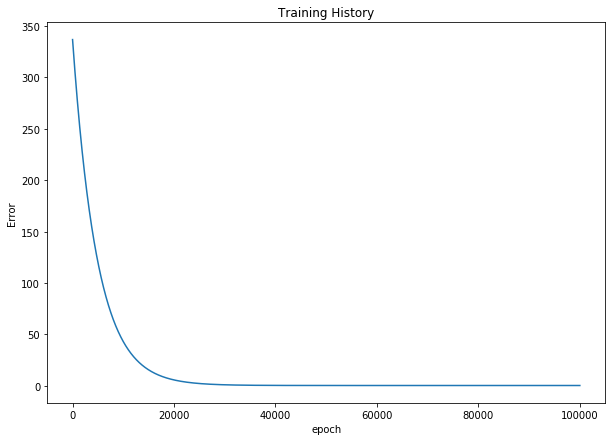

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_hist, error_hist);
plt.title('Training History');
plt.xlabel('epoch');
plt.ylabel('Error');

In [47]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.5535787754767713

In [48]:
# Use linspace to get a range of values, in 20 yr increments
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
x

array([1902.        , 1907.68421053, 1913.36842105, 1919.05263158,
       1924.73684211, 1930.42105263, 1936.10526316, 1941.78947368,
       1947.47368421, 1953.15789474, 1958.84210526, 1964.52631579,
       1970.21052632, 1975.89473684, 1981.57894737, 1987.26315789,
       1992.94736842, 1998.63157895, 2004.31578947, 2010.        ])

In [49]:
trend_x = np.ones((2, len(x)))
trend_x[0,:] = x
trend_x[1,:] = 1
trend_x /= trend_x.max()
trend_x

array([[9.46268657e-01, 9.49096622e-01, 9.51924588e-01, 9.54752553e-01,
        9.57580518e-01, 9.60408484e-01, 9.63236449e-01, 9.66064415e-01,
        9.68892380e-01, 9.71720346e-01, 9.74548311e-01, 9.77376277e-01,
        9.80204242e-01, 9.83032207e-01, 9.85860173e-01, 9.88688138e-01,
        9.91516104e-01, 9.94344069e-01, 9.97172035e-01, 1.00000000e+00],
       [4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04]])

In [50]:
trend_y = h_x(Theta, trend_x)
trend_y

array([17.69802689, 17.75091824, 17.80380958, 17.85670093, 17.90959228,
       17.96248362, 18.01537497, 18.06826631, 18.12115766, 18.174049  ,
       18.22694035, 18.2798317 , 18.33272304, 18.38561439, 18.43850573,
       18.49139708, 18.54428842, 18.59717977, 18.65007111, 18.70296246])

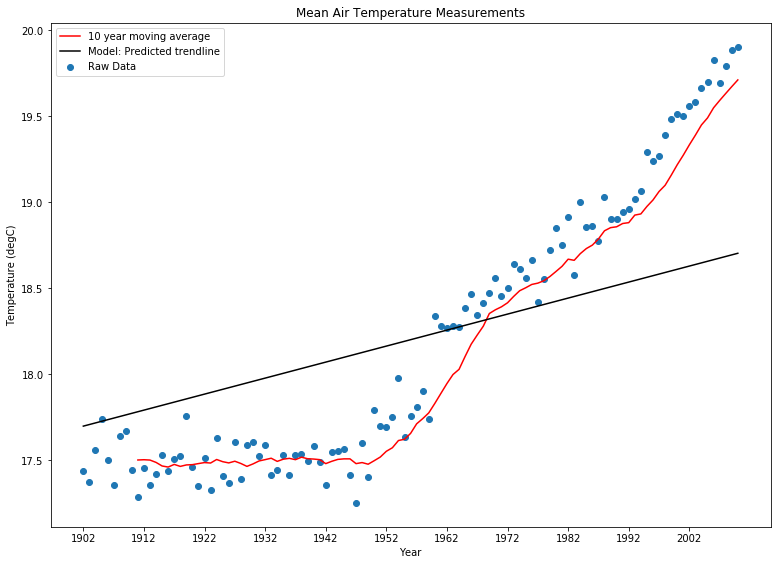

In [51]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data');
ax.plot(df_group_year.index, rolling, c='r', label=f'{window} year moving average');
ax.plot(x, trend_y, c='k', label='Model: Predicted trendline')


ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

# Exercise 6 Autoregressors

For this exercise we will load a different dataset.  

In [52]:
df = pd.read_csv('spx.csv')
yr = []
for x in df.date:
    x = int(x[-2:])
    if x < 10:
        x = f'200{x}'
    elif x < 20:
        x = f'20{x}'
    else:
        x = f'19{x}'  
    yr.append(x)
df['Year'] = yr
df.head()

,date,close,Year
0,02-Jan-86,209.59,1986
1,03-Jan-86,210.88,1986
2,06-Jan-86,210.65,1986
3,07-Jan-86,213.80,1986
4,08-Jan-86,207.97,1986


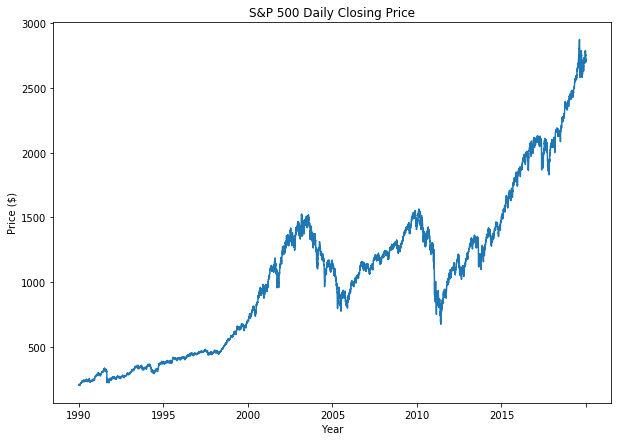

In [53]:
plt.figure(figsize=(10, 7))
plt.plot(df.close.values);
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');

Let's look at what lag is actually doing to the data

In [54]:
df.close[:10].values

array([209.59, 210.88, 210.65, 213.8 , 207.97, 206.11, 205.96, 206.72,
       206.64, 208.26])

In [55]:
df.close[:10].shift(3).values

array([   nan,    nan,    nan, 209.59, 210.88, 210.65, 213.8 , 207.97,
       206.11, 205.96])

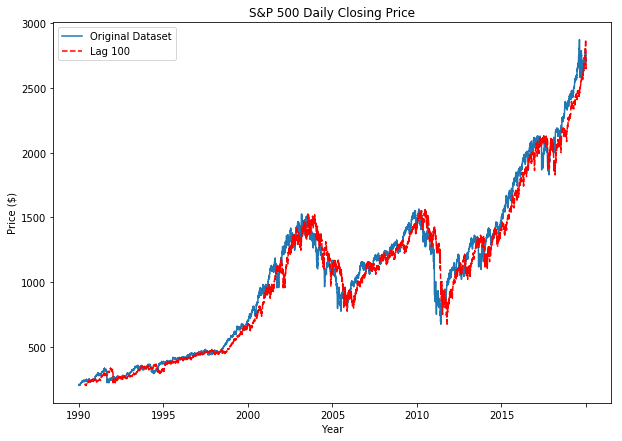

In [56]:
plt.figure(figsize=(10, 7))
plt.plot(df.close.values, label='Original Dataset');
plt.plot(df.close.shift(100), c='r', linestyle='--',
    label='Lag 100');
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');
plt.legend();

We need to check if autoregression is appropriate for the dataset.  To do this we will use an autocorrelation plot.

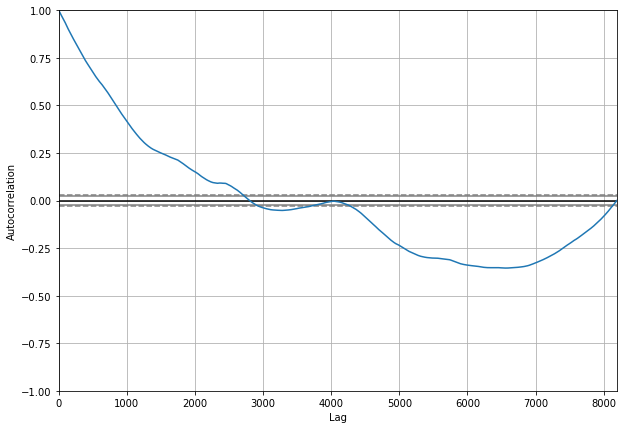

In [57]:
plt.figure(figsize=(10, 7))
pd.plotting.autocorrelation_plot(df.close);

Enhance the view of the autocorrelation plot.

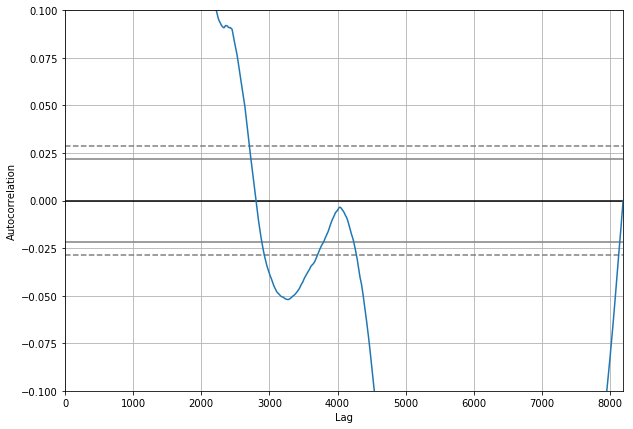

In [58]:
plt.figure(figsize=(10, 7))
ax = pd.plotting.autocorrelation_plot(df.close);
ax.set_ylim([-0.1, 0.1]);

Let's visualise the correlation between the original dataset and the dataset with a lag of 100, which has a high degree of correlation.

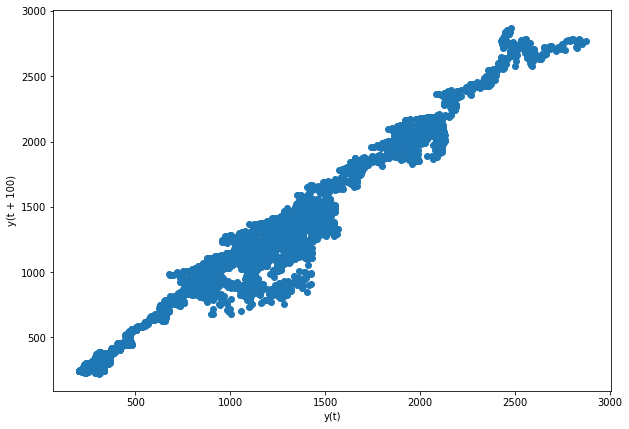

In [59]:
plt.figure(figsize=(10,7))
ax = pd.plotting.lag_plot(df.close, lag=100);

We will also visualise a lag setting which results in poor correlation (lag = 400)

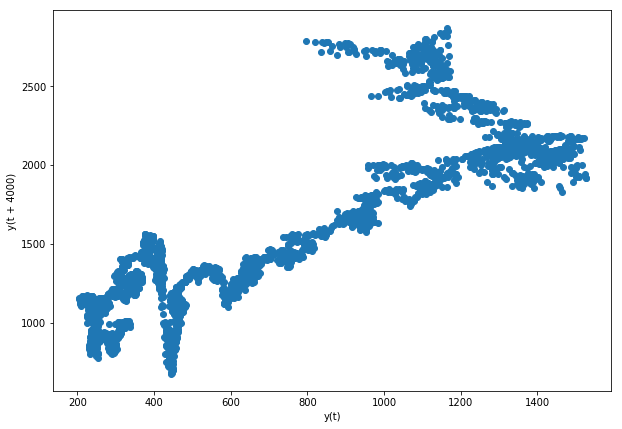

In [60]:
plt.figure(figsize=(10,7))
ax = pd.plotting.lag_plot(df.close, lag=4000);

To create a autoregression model import the *statsmodel* package

In [61]:
# !pip install statsmodels
# !conda install -c conda-forge statsmodels

In [62]:
from statsmodels.tsa.ar_model import AR
model = AR(df.close)

In [63]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 36
Coefficients: const        0.114237
L1.close     0.944153
L2.close     0.008452
L3.close     0.046900
L4.close    -0.014887
L5.close    -0.024734
L6.close     0.025849
L7.close    -0.004821
L8.close     0.009209
L9.close    -0.010451
L10.close    0.033449
L11.close   -0.029657
L12.close    0.052843
L13.close   -0.031489
L14.close   -0.023010
L15.close   -0.018195
L16.close    0.060165
L17.close    0.004425
L18.close   -0.057269
L19.close    0.025184
L20.close    0.008416
L21.close   -0.020273
L22.close    0.024271
L23.close   -0.010330
L24.close    0.004574
L25.close   -0.016035
L26.close    0.005954
L27.close    0.032375
L28.close   -0.037643
L29.close    0.024265
L30.close   -0.006099
L31.close   -0.018106
L32.close    0.005761
L33.close   -0.002750
L34.close   -0.037882
L35.close    0.046765
L36.close    0.000887
dtype: float64


In [64]:
predictions = model_fit.predict(start=36, end=len(df) + 500)
predictions[:10].values

array([224.22071026, 224.18191256, 224.47901622, 224.15407352,
       226.46426347, 226.72721775, 225.6576946 , 224.52871226,
       224.56431615, 225.15588295])

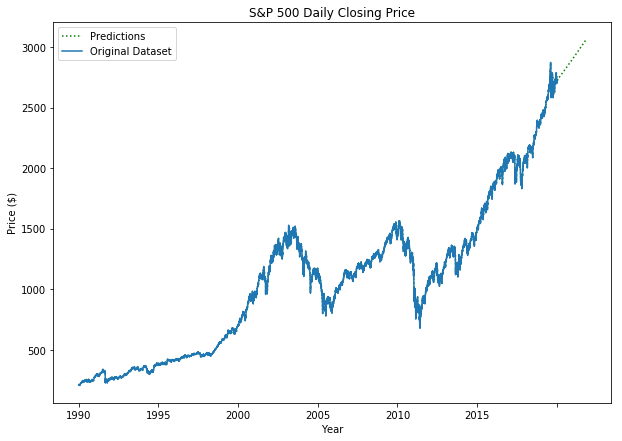

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(predictions, c='g', linestyle=':', label='Predictions');
plt.plot(df.close.values, label='Original Dataset');
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');
plt.legend();

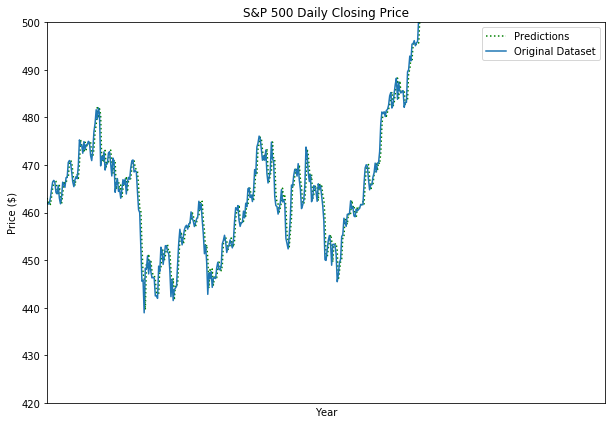

In [71]:
plt.figure(figsize=(10, 7))
plt.plot(predictions, c='g', linestyle=':', label='Predictions');
plt.plot(df.close.values, label='Original Dataset');
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');
plt.xlim([2000, 2500])
plt.ylim([420, 500])
plt.legend();